In [3]:
#Analysis II: Text Mining Analysis for Room Name

In [4]:
#Import libraries used for data exploration, visualization, and analysis of the listings dataset.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import os
import re
import nltk
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')
import nltk as nlp
import nltk.corpus
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from collections import Counter

In [5]:
#Data Exploration

In [6]:
#Using pandas library and 'read_csv' function to read listingscsv.csv file into Python.
airbnb = pd.read_csv('listingscsv.csv')

In [7]:
#Displays the first 5 rows from the listings dataset with all variables as example.
airbnb.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,46,14/7/2019,0.39,2,288
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,274,26/7/2019,4.64,1,212
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19/11/2018,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,75,21/7/2019,0.60,1,127


In [8]:
#Displays the number of observations from the listings dataset.
len(airbnb)

48864

In [9]:
#Displays all the columns(variables) from the listings dataset.
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [10]:
airbnb.shape

(48864, 16)

In [11]:
#prints the number of variables and observations of the listings dataset.
print('Number of variables: {}'.format(airbnb.shape[1]))
print('Number of observations: {}'.format(airbnb.shape[0]))

Number of variables: 16
Number of observations: 48864


In [12]:
#shows the datatype of the variables.
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [13]:
#Data Cleaning

In [14]:
#Checking which variable contains null or missing values.
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            18
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10131
reviews_per_month                 10131
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [15]:
#Dropping variables for future data exploration and analysis.
airbnb.drop(['id', 'host_name', 'neighbourhood', 'neighbourhood_group', 'latitude', 'longitude', 
             'minimum_nights', 'reviews_per_month', 'last_review', 
   'calculated_host_listings_count', 'availability_365'], axis=1, inplace=True)

In [16]:
#Checking variables after dropping.
airbnb.isnull().sum()

name                 16
host_id               0
room_type             0
price                 0
number_of_reviews     0
dtype: int64

In [17]:
#Replacing null or missing values from 'name' with 'No name'.
airbnb.fillna({'name':'Nameless'}, inplace=True)

In [18]:
#Checking variables after replacing.
airbnb.isnull().sum()

name                 0
host_id              0
room_type            0
price                0
number_of_reviews    0
dtype: int64

In [19]:
#Displays the first 10 rows from the listings dataset with all variables after cleaning as example.
airbnb.head(5)

,name,host_id,room_type,price,number_of_reviews
0,Skylit Midtown Castle,2845,Entire home/apt,225,46
1,THE VILLAGE OF HARLEM....NEW YORK !,4632,Private room,150,0
2,Cozy Entire Floor of Brownstone,4869,Entire home/apt,89,274
3,Entire Apt: Spacious Studio/Loft by central park,7192,Entire home/apt,80,9
4,Large Cozy 1 BR Apartment In Midtown East,7322,Entire home/apt,200,75


In [20]:
airbnb['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [21]:
#Data Analysis

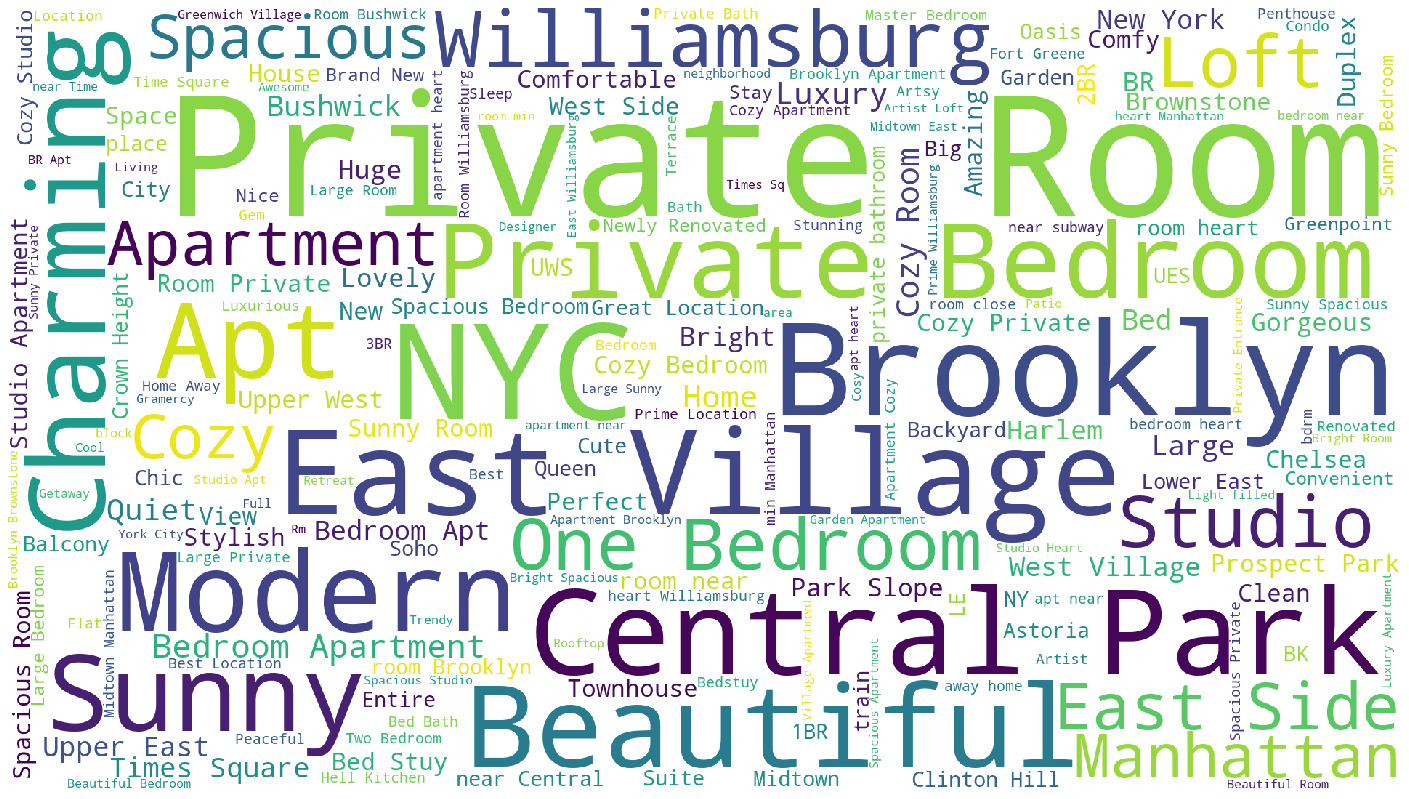

In [22]:
plt.figure(figsize=(25,15))
name_wordcloud = WordCloud (background_color='white', width=1920, height=1080).generate(" ".join(airbnb.name))
plt.imshow(name_wordcloud)
plt.axis('off')
plt.savefig('name_wordcloud.png')
plt.show()

In [23]:
#convert text to lowercase 
#removing numbers 
#removing punctuation 
#removing stop words
#Lemmatization
#filter out single characters 
cleaned_name_list = []
for cleaned_name in airbnb.name:
    cleaned_name = re.sub("[^a-zA-Z]", " ", cleaned_name)
    cleaned_name = cleaned_name.lower()
    cleaned_name = nltk.word_tokenize(cleaned_name)
    cleaned_name = [word for word in cleaned_name if not word in 
                    set(stopwords.words("english"))]
    lemma = nlp.WordNetLemmatizer()
    cleaned_name = [lemma.lemmatize(word) for word in cleaned_name]
    cleaned_name = " ".join(w for w in cleaned_name if len(w) > 1)
    cleaned_name_list.append(cleaned_name)

In [24]:
airbnb["cleaned_name"] = cleaned_name_list
airbnb.head(10)

,name,host_id,room_type,price,number_of_reviews,cleaned_name
0,Skylit Midtown Castle,2845,Entire home/apt,225,46,skylit midtown castle
1,THE VILLAGE OF HARLEM....NEW YORK !,4632,Private room,150,0,village harlem new york
2,Cozy Entire Floor of Brownstone,4869,Entire home/apt,89,274,cozy entire floor brownstone
3,Entire Apt: Spacious Studio/Loft by central park,7192,Entire home/apt,80,9,entire apt spacious studio loft central park
4,Large Cozy 1 BR Apartment In Midtown East,7322,Entire home/apt,200,75,large cozy br apartment midtown east
5,BlissArtsSpace!,7356,Private room,60,49,blissartsspace
6,Large Furnished Room Near B'way,8967,Private room,79,434,large furnished room near way
7,Cozy Clean Guest Room - Family Apt,7490,Private room,79,118,cozy clean guest room family apt
8,Best Hideaway,7516,Entire home/apt,116,94,best hideaway
9,Cute & Cozy Lower East Side 1 bdrm,7549,Entire home/apt,150,161,cute cozy lower east side bdrm


In [25]:
#removing whitespaces
#split names for counter
def split_name(cleaned_name):
    split = str(cleaned_name).split()
    return split

room_name_count_list = []
for x in cleaned_name_list:
    for y in split_name(x):
        room_name_count_list.append(y)

In [26]:
#let's see top 25 used words by host to name their listing
top_25_room_names = Counter(room_name_count_list).most_common()
top_25_room_names = top_25_room_names[0:25]

In [27]:
#now let's put our findings in dataframe for further visualizations
sub_plot=pd.DataFrame(top_25_room_names)
sub_plot.rename(columns={0:'Words', 1:'Count'}, inplace=True)

[Text(0, 0, 'room'),
 Text(0, 0, 'bedroom'),
 Text(0, 0, 'private'),
 Text(0, 0, 'apartment'),
 Text(0, 0, 'cozy'),
 Text(0, 0, 'apt'),
 Text(0, 0, 'brooklyn'),
 Text(0, 0, 'br'),
 Text(0, 0, 'studio'),
 Text(0, 0, 'spacious'),
 Text(0, 0, 'manhattan'),
 Text(0, 0, 'park'),
 Text(0, 0, 'east'),
 Text(0, 0, 'sunny'),
 Text(0, 0, 'williamsburg'),
 Text(0, 0, 'bed'),
 Text(0, 0, 'beautiful'),
 Text(0, 0, 'near'),
 Text(0, 0, 'village'),
 Text(0, 0, 'nyc'),
 Text(0, 0, 'loft'),
 Text(0, 0, 'large'),
 Text(0, 0, 'heart'),
 Text(0, 0, 'min'),
 Text(0, 0, 'home')]

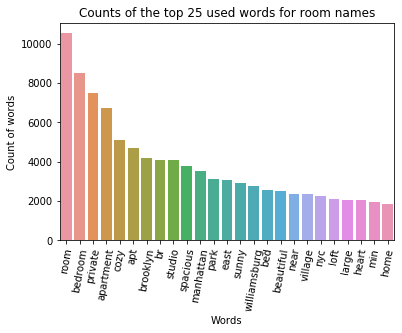

In [28]:
#we are going to use barplot for this visualization
viz_1=sns.barplot(x='Words', y='Count', data=sub_plot)
viz_1.set_title('Counts of the top 25 used words for room names')
viz_1.set_ylabel('Count of words')
viz_1.set_xlabel('Words')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=80)

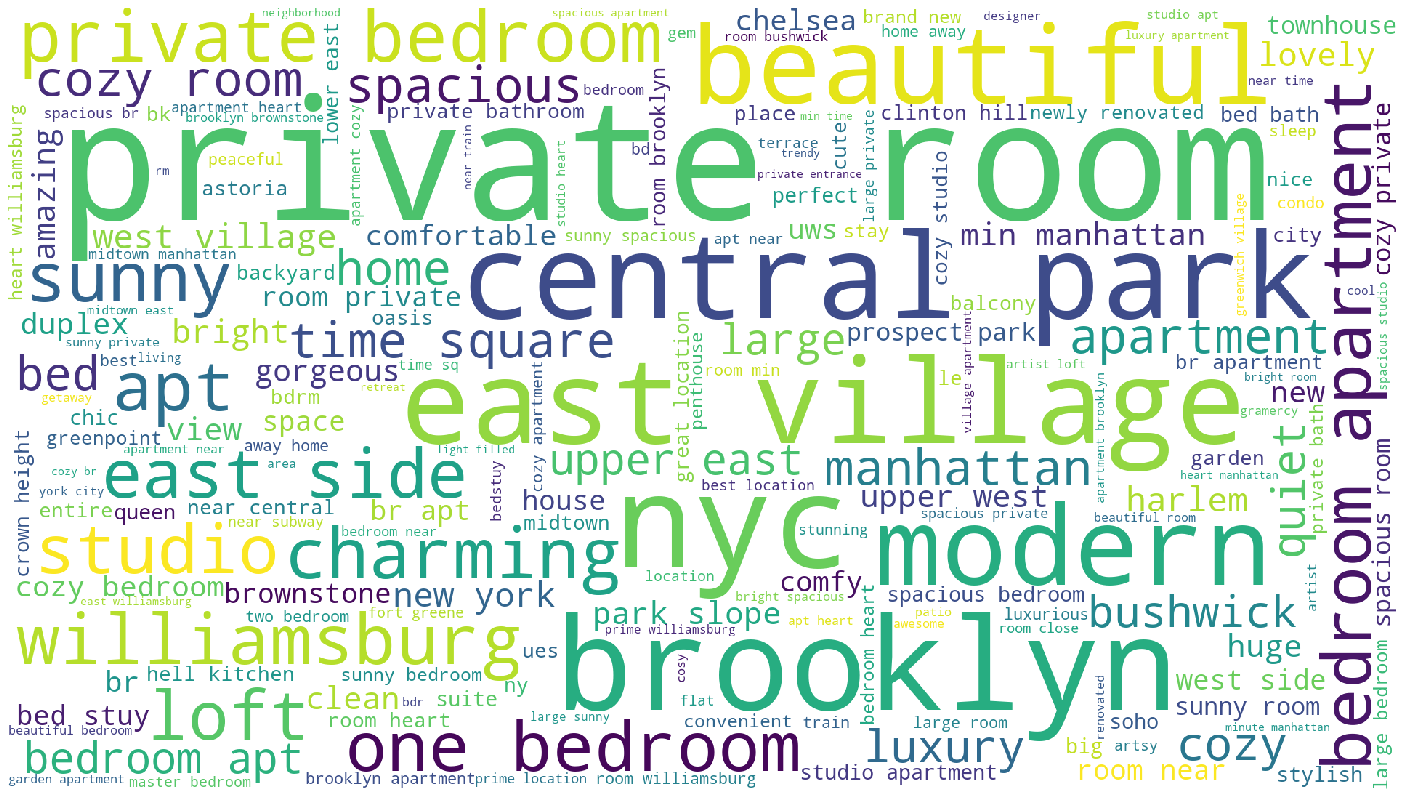

In [29]:
plt.figure(figsize=(25,15))
cleaned_name_wordcloud = WordCloud (background_color='white', width=1920, 
                         height=1080).generate(" ".join(airbnb.cleaned_name))
plt.imshow(cleaned_name_wordcloud)
plt.axis('off')
plt.savefig('cleaned_name_wordcloud.png')
plt.show()